In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.chdir("C:/Users/SANDEEP/Desktop/Python project/DATASET/Python")

In [3]:
# Reading data

df = pd.read_table("XYZCorp_LendingData.txt",sep='\t',parse_dates=['issue_d'])

C:\Users\SANDEEP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# checking top 5 rows of dataframe

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
# checking shape of dataset

df.shape

(855969, 73)

In [6]:
# checking dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null datetime64[ns]
pymnt_plan   

# DATA CLEANING

In [7]:
# As a first step of data cleaning, Dropping columns with more than 50% NA values

df.columns[df.isnull().mean() > 0.5]

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [8]:
# Dropping 21 columns with more than 50% NA values

high_na_cols = ['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m']

df.drop(high_na_cols,axis=1,inplace=True)

In [9]:
df.shape

(855969, 52)

In [10]:
# As a second step of data cleaning, dropping some more columns which include information like Id's,loan numbers,loan codes etc
# which seems not important after domain research and also dates columns which Ml models doesnt support.

less_imp_cols = ['id','member_id','sub_grade','emp_title','zip_code','addr_state','title','earliest_cr_line','last_pymnt_d',
                'next_pymnt_d','last_credit_pull_d','policy_code']

df.drop(less_imp_cols,axis=1,inplace=True)

In [11]:
#NOTE:
# one column named issue_d which is of date format is to be deleted after separation of train and test data.
# we can delete some more independent columns which are highly correlated in order to address the issue of multicollinearity.

In [12]:
# out of domain research, some columns seems very important to the model

# important_cols = ['funded_amt','term','int_rate','installment','dti','annual_inc','emp_length','home_ownership','verification_status','purpose','delinq_2yrs','open_acc']

# DATA ANALYSIS

In [13]:
# checking for multicollinearity between columns
# we can see pearson correlation coefficient along with two tailed p value

from scipy.stats import pearsonr

print(pearsonr(x = df['funded_amnt'] , y = df['funded_amnt_inv']))
print(pearsonr(x = df['total_acc'] , y = df['open_acc']))
print(pearsonr(x = df['out_prncp'] , y = df['out_prncp_inv']))
print(pearsonr(x = df['total_pymnt'] , y = df['total_pymnt_inv']))


(0.9984846499607687, 0.0)
(0.6948500464695232, 0.0)
(0.9999972620233057, 0.0)
(0.99812064577028, 0.0)


In [14]:
# seems there exists multicollinearity between columns.

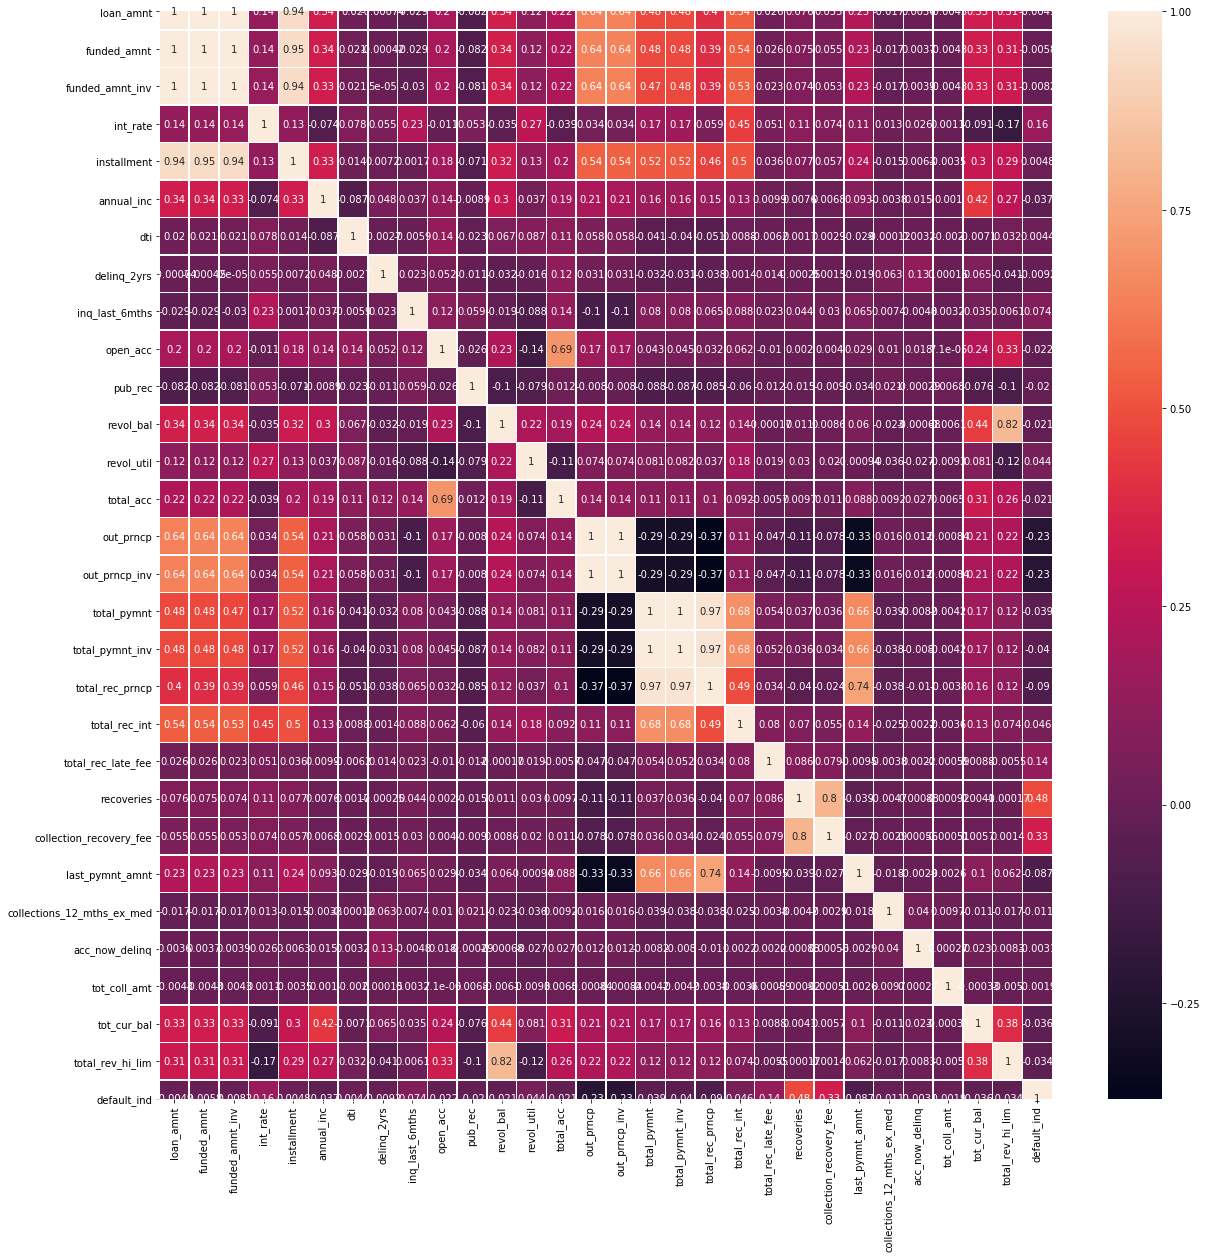

In [15]:
# Visualsing the same collinearity issue between columns with heatmap
# we can visualise the above results and we can drop one column from the pair of 2 columns tested, ideal way to choose (cont)
# the column which has high correlation with the target

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [16]:
checking_cols = pd.DataFrame(df[['funded_amnt','default_ind','funded_amnt_inv','total_acc','open_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv']])

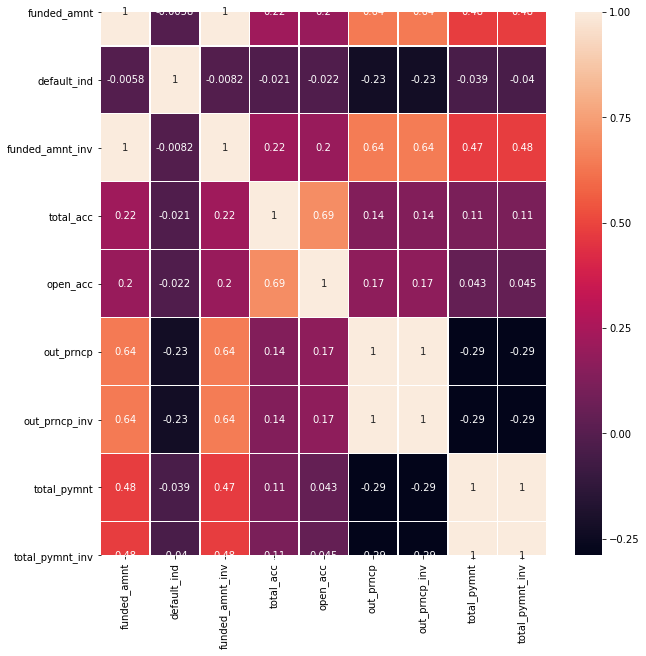

In [17]:
# we can see from below map that funded_amt,total_acc,out_prncp,total_pymnt are a bit better correlated with target than others.

plt.figure(figsize=(10,10))
sns.heatmap(checking_cols.corr(),annot=True,linewidths=.5)

In [18]:
# dropping 4 columns which has multicollinearity

low_correlation_cols = ['funded_amnt_inv','open_acc','out_prncp_inv','total_pymnt_inv']

df.drop(low_correlation_cols,axis=1,inplace=True)

# CHECKING TARGET DISTRIBUTION

In [19]:
#checking target distribution to check whether class are balanced or imbalanced
# we can see high imbalance between the classes distribution in target column

df['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

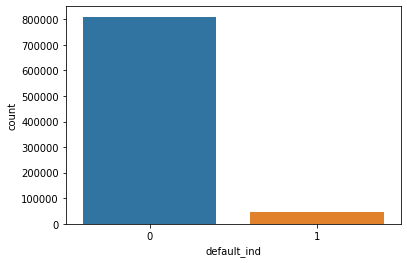

In [20]:
# visual representation of target distribution
sns.countplot(x='default_ind',data=df)

# INSIGHTS INTO DATA

In [21]:
# lets analyse what categories or levels in columns which lead to default the most.


In [22]:
df_default = df[df['default_ind'] == 1]
df_non_default = df[df['default_ind'] == 0]

In [23]:
# out of all defaulters, people who has taken loan for debt consolidation defaulted the most.

In [24]:
df_default.groupby('purpose').default_ind.count()

purpose
car                     458
credit_card            8059
debt_consolidation    28389
educational              56
home_improvement       2316
house                   293
major_purchase          888
medical                 584
moving                  436
other                  3001
renewable_energy         54
small_business         1390
vacation                278
wedding                 265
Name: default_ind, dtype: int64

In [25]:
# OUT OF TOTAL 46467 DEFAULT CASES, SANCTIONED TERM OF 36 MONTHS LEAD TO MORE DEFAULTS THAN 60 MONTHS
# SEEMS MORE REPAYMENT TIME RESULTS IN LESS CHANCE OF DEFAULT(compared to 36 months term)

In [26]:
df_default.groupby('term').default_ind.count()

term
 36 months    29798
 60 months    16669
Name: default_ind, dtype: int64

In [27]:
# Income source verification has almost equal chance of getting default.

In [28]:
df_default.groupby('verification_status').default_ind.count()

verification_status
Not Verified       12486
Source Verified    14202
Verified           19779
Name: default_ind, dtype: int64

In [29]:
# Loans with grades C,D,B,E has more defaults than other type of loans

df_default.groupby('grade').default_ind.count()

grade
A     2664
B     9717
C    13002
D    10798
E     6459
F     3013
G      814
Name: default_ind, dtype: int64

In [30]:
# people with rent house and houses in mortgage has defaulted the maximum in total list of defaulters

df_default.groupby('home_ownership').default_ind.count()

home_ownership
MORTGAGE    20376
NONE            7
OTHER          27
OWN          4135
RENT        21922
Name: default_ind, dtype: int64

# DIVIDING TRAIN AND TEST DATA

In [31]:
df['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [32]:
train_data = df[(df['issue_d'] >= '2007-06-01') & (df['issue_d'] <= '2015-05-01')]
test_data = df[(df['issue_d'] >= '2015-06-01') & (df['issue_d'] <= '2015-12-01')]

In [33]:
print(train_data.shape)

(598978, 36)


In [34]:
print(test_data.shape)

(256991, 36)


In [35]:
# As the splitting is done,we should remove column 'issue_d' as it wont be supported by models

train_data.drop('issue_d',axis=1,inplace=True)
test_data.drop('issue_d',axis=1,inplace=True)

C:\Users\SANDEEP\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Decoupling Target from independent variables

In [36]:
X_train = train_data[train_data.columns.difference(['default_ind'])]
y_train = train_data['default_ind']

In [37]:
X_test = test_data[test_data.columns.difference(['default_ind'])]
y_test = test_data['default_ind']

# Dummification for X_train and X_test

In [38]:
X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)

In [39]:
print(X_train.shape)
print(X_test.shape)

(598978, 64)
(256991, 61)


# Alignment for getting same number of matching columns from X_train and X_test

In [40]:
# columns in X_train and X_test dont have same number of columns because , as we have done a random split and we have done dummification
# so some levels in column will be missed.This is the reason for mismatch.

X_train,X_test = X_train.align(X_test,join='inner',axis=1)



In [41]:
# now check the shape of columns in X_train and X_test,we will have same number of columns.

print(X_train.shape)
print(X_test.shape)

(598978, 60)
(256991, 60)


# Impuation for columns which have missing values in X_train and X_test

In [42]:
# All missing value columns in X_train

X_train.columns[X_train.isnull().any()]

Index(['collections_12_mths_ex_med', 'revol_util', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [43]:
X_train_num_cols = ['collections_12_mths_ex_med','revol_util','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

In [44]:
from sklearn.impute import SimpleImputer
X_train_imputer = SimpleImputer(strategy='median')
X_train.loc[:,X_train_num_cols] = X_train_imputer.fit_transform(X_train[X_train_num_cols])

In [45]:
# cross checking whether all columns are imputed or not
X_train.columns[X_train.isnull().any()]

Index([], dtype='object')

In [46]:
# Imputation of X_test columns

In [47]:
X_test.columns[X_test.isnull().any()]

Index(['revol_util'], dtype='object')

In [48]:
X_test_num_cols = ['revol_util']

In [49]:
X_test['revol_util'].fillna(X_test['revol_util'].median(),inplace=True)

In [50]:
# cross checking whether imputed or not
X_test['revol_util'].isnull().sum()

0

In [51]:
# DONE WITH IMPUTATION

In [52]:
# shape of training datasets before oversampling

print(sum(y_train == 0))
print(sum(y_train == 1))

print(X_train.shape)
print(y_train.shape)

552822
46156
(598978, 60)
(598978,)


# Over sampling using SMOTE

In [53]:
#!pip install imblearn

In [54]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_sam,y_train_sam = sm.fit_sample(X_train,y_train)
X_test_sam,y_test_sam = sm.fit_sample(X_test,y_test)

In [56]:
# we can see the increase in sample size.

print(X_train_sam.shape)
print(y_train_sam.shape)

print(sum(y_train_sam == 0))
print(sum(y_train_sam == 1))

(1105644, 60)
(1105644,)
552822
552822


# Feauture Scaling

In [57]:
#from sklearn.preprocessing import MinMaxScaler
#X_train_scaler = MinMaxScaler()
#X_train_scaled = pd.DataFrame(X_train_scaler.fit_transform(X_train),columns=X_train.columns)
#X_test_scaled = pd.DataFrame(X_train_scaler.transform(X_test),columns=X_test.columns)

In [58]:
# checking whether scaled or not

#X_train_scaled.describe()

In [59]:
# Done with feature scaling

In [60]:
# Done with preprocessing

# Important feautures selection using SelectKBest

In [61]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

#important_cols = SelectKBest(chi2,20).fit_transform(X_train_scaled,y_train)

# MODELS

# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(class_weight='balanced')
regressor.fit(X_train_sam,y_train_sam)

C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
# checking for overfitting or underfitting by seeing accuracy score of model on training and test data

print(regressor.score(X_train_sam,y_train_sam))
print(regressor.score(X_test_sam,y_test_sam))

0.9912765772708032
0.9568217235468287


In [70]:
# logistic regression model predictions

regressor_pred = regressor.predict(X_test_sam)

In [71]:
# Evaluating model performance

from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score,recall_score

print(classification_report(y_test_sam,regressor_pred))
print(confusion_matrix(y_test_sam,regressor_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    256680
           1       1.00      0.91      0.95    256680

    accuracy                           0.96    513360
   macro avg       0.96      0.96      0.96    513360
weighted avg       0.96      0.96      0.96    513360

[[256567    113]
 [ 22053 234627]]


In [66]:
# cross validation for checking model stability on different sets of train and test data

from sklearn.model_selection import cross_val_score

logistic_regressor = LogisticRegression()

print(cross_val_score(logistic_regressor,X_train_sam,y_train_sam,cv=10,scoring='accuracy').mean())

C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

0.9904408732366999


# Decision Tree Classifier

In [72]:
# Decision tree base model

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
dtc.fit(X_train_sam,y_train_sam)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
print(dtc.score(X_train_sam,y_train_sam))
print(dtc.score(X_test_sam,y_test_sam))

1.0
0.7552925822035219


In [74]:
dtc_predictions = dtc.predict(X_test_sam)

In [75]:
print(classification_report(y_test_sam,dtc_predictions))
print(confusion_matrix(y_test_sam,dtc_predictions))

              precision    recall  f1-score   support

           0       0.98      0.52      0.68    256680
           1       0.67      0.99      0.80    256680

    accuracy                           0.76    513360
   macro avg       0.83      0.76      0.74    513360
weighted avg       0.83      0.76      0.74    513360

[[133794 122886]
 [  2737 253943]]


In [76]:
# Hyper parameter tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,100,1),'criterion':['gini','entropy'],'max_leaf_nodes':np.arange(1,100,1),
             'min_samples_leaf':np.arange(1,100,1),'min_samples_split':np.arange(1,100,1)}
dt_grid_search = RandomizedSearchCV(dt_classifier,param_distributions=dt_params)
dt_grid_search.fit(X_train_sam,y_train_sam)

print(dt_grid_search.best_estimator_.score(X_train_sam,y_train_sam))
print(dt_grid_search.best_estimator_.score(X_test_sam,y_test_sam))
print(dt_grid_search.best_estimator_)


0.995555531436882
0.9561457846345645
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=99,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=49,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [114]:
#dt_tuned_model = dt_grid_search.predict(X_test)

In [115]:
#print(classification_report(y_test,dt_tuned_model))

In [116]:
# DECISION TREE NEW MODEL WITH TUNED MODEL BEST ESTIMATOR PARAMETERS

In [77]:
newdtmodel = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=99,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=49,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
newdtmodel.fit(X_train_sam,y_train_sam)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=99,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=49,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [79]:
newdtmodel_pred = newdtmodel.predict(X_test_sam)

In [80]:
print(classification_report(y_test_sam,newdtmodel_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96    256680
           1       0.99      0.92      0.95    256680

    accuracy                           0.96    513360
   macro avg       0.96      0.96      0.96    513360
weighted avg       0.96      0.96      0.96    513360



In [81]:
# Decision tree cross validation

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
print(cross_val_score(decisiontree,X_train_sam,y_train_sam,cv=10,scoring='accuracy').mean())

0.9888906405666532


# Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train_sam,y_train_sam)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
print(rfc.score(X_train_sam,y_train_sam))
print(rfc.score(X_test_sam,y_test_sam))

0.999998191099486
0.8705275050646719


In [84]:
# rfc predictions
rfc_pred = rfc.predict(X_test_sam)

In [85]:
print(classification_report(y_test_sam,rfc_pred))
print(confusion_matrix(y_test_sam,rfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85    256680
           1       0.80      0.99      0.88    256680

    accuracy                           0.87    513360
   macro avg       0.89      0.87      0.87    513360
weighted avg       0.89      0.87      0.87    513360

[[192181  64499]
 [  1967 254713]]


In [86]:
# hyper parameter tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_params = {'n_estimators':np.arange(100,300,5),'max_features':['auto','sqrt'],'max_depth':np.arange(1,100,2),'max_leaf_nodes':np.arange(1,50,1)
            ,'min_samples_split':[1,30,1],'min_samples_leaf':[1,20,1]}
rf_grid_search = RandomizedSearchCV(rf,param_distributions=rf_params)
rf_grid_search.fit(X_train_sam,y_train_sam)

print(rf_grid_search.best_estimator_.score(X_train_sam,y_train_sam))
print(rf_grid_search.best_estimator_.score(X_test_sam,y_test_sam))

C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1

C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1

0.9789778626755086
0.8596949509116409


In [269]:
#rf_tuned_model = rf_grid_search.predict(X_test)

In [270]:
#print(classification_report(y_test,rf_tuned_model))

In [87]:
print(rf_grid_search.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=99, max_features='auto',
                       max_leaf_nodes=36, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=220,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
# Building new random forest model with tuned model best estimator parameters.

In [88]:
newrfmodel = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=99, max_features='auto',
                       max_leaf_nodes=36, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=220,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

newrfmodel.fit(X_train_sam,y_train_sam)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=99, max_features='auto',
                       max_leaf_nodes=36, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=220,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
newrfmodel_pred = newrfmodel.predict(X_test_sam)

In [90]:
print(classification_report(y_test_sam,newrfmodel_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    256680
           1       1.00      0.72      0.84    256680

    accuracy                           0.86    513360
   macro avg       0.89      0.86      0.86    513360
weighted avg       0.89      0.86      0.86    513360



In [91]:
# we can see Logistic and Decision tree performed well than Random Forest.

# STACKING

In [92]:
from sklearn.ensemble import StackingClassifier
estimators = [('logistic',regressor),('rf',newrfmodel),('dt',newdtmodel)]

stack = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

stack.fit(X_train_sam,y_train_sam)


print(stack.score(X_train_sam,y_train_sam))
print(stack.score(X_test_sam,y_test_sam))

C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

0.9958530955714497
0.9830742558828113


In [ ]:
# AFTER STACKING WE ARE ACHIEVING THE MAXIMUM ACCURACY OF 98.30